In [52]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt


In [55]:
load_traj("/home/litian/Desktop/RPG/Concept/solver/envs/rigidbody2d/exp/move1/debug/trajs/2")

[{'s': tensor([[[-7.4000e-01,  0.0000e+00,  4.0000e-01,  ...,  0.0000e+00,
             8.0000e-01,  0.0000e+00],
           [-7.4000e-01,  0.0000e+00,  4.0000e-01,  ...,  0.0000e+00,
             8.0000e-01,  0.0000e+00],
           [-7.4000e-01,  0.0000e+00,  4.0000e-01,  ...,  0.0000e+00,
             8.0000e-01,  0.0000e+00],
           ...,
           [-7.4000e-01,  0.0000e+00,  4.0000e-01,  ...,  0.0000e+00,
             8.0000e-01,  0.0000e+00],
           [-7.4000e-01,  0.0000e+00,  4.0000e-01,  ...,  0.0000e+00,
             8.0000e-01,  0.0000e+00],
           [-7.4000e-01,  0.0000e+00,  4.0000e-01,  ...,  0.0000e+00,
             8.0000e-01,  0.0000e+00]],
  
          [[-5.2893e-01,  9.7163e-02,  3.2537e+00,  ...,  0.0000e+00,
             8.0000e-01,  0.0000e+00],
           [-5.4586e-01, -8.8256e-02,  2.9715e+00,  ...,  0.0000e+00,
             8.0000e-01,  0.0000e+00],
           [-5.2514e-01,  1.0193e-01,  3.3170e+00,  ...,  0.0000e+00,
             8.0000e-01,  0.0000e

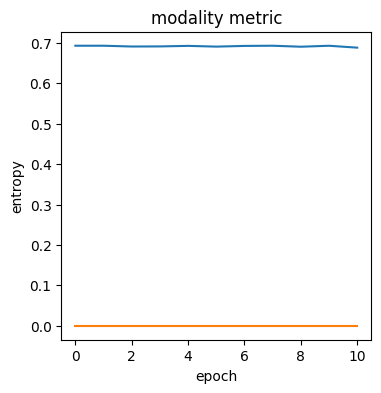

In [58]:
def modality_metric(traj_dir):
    all_trajs = []
    # print(sorted(os.listdir(traj_dir), key=lambda x: int(x)))
    for fname in sorted(os.listdir(traj_dir), key=lambda x: int(x)):
        all_trajs.append(load_traj(f"{traj_dir}/{fname}"))

    epoch_entropy = []
    epoch_trajs = []
    epoch_classes = []
    for epoch in range(len(all_trajs)):

        traj_batches = []
        for traj in all_trajs[epoch]:
            traj_batches.append(build_traj_batch(traj))
        traj_batch = np.concatenate(traj_batches, axis=0)
        # print(traj_batch.shape) # (b, t, s_dim)

        classes = classify(traj_batch)
        epoch_classes.append(classes)
        epoch_entropy.append(entropy(classes))
        epoch_trajs.append(traj_batch)

    return dict(epoch_entropy=epoch_entropy, epoch_trajs=epoch_trajs, epoch_classes=epoch_classes)


traj_dir1 = "/home/litian/Desktop/RPG/Concept/solver/envs/rigidbody2d/exp/move1/debug/trajs"
traj_dir2 = "/home/litian/Desktop/RPG/Concept/solver/envs/rigidbody2d/exp/move1/gd/trajs"

plt.figure(figsize=(4,4)); 
plt.title("modality metric")
plt.xlabel("epoch"); plt.ylabel("entropy")
plt.plot(modality_metric(traj_dir1)['epoch_entropy'])
plt.plot(modality_metric(traj_dir2)['epoch_entropy'])
plt.show()


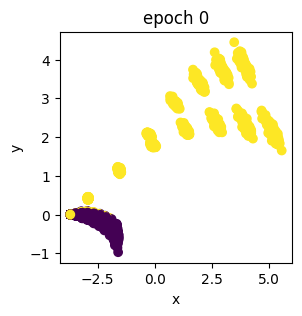

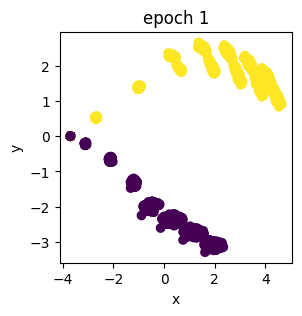

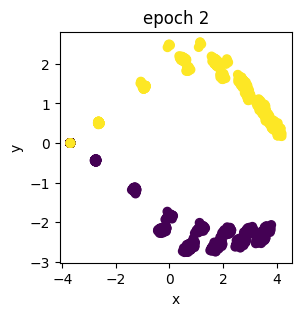

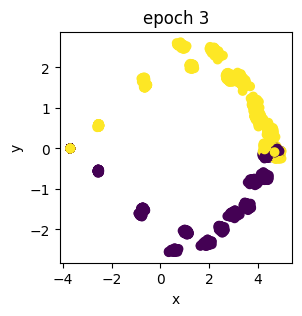

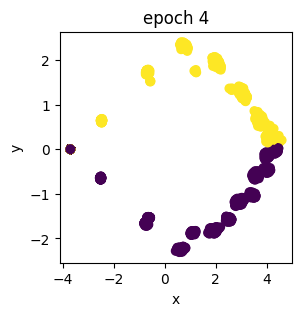

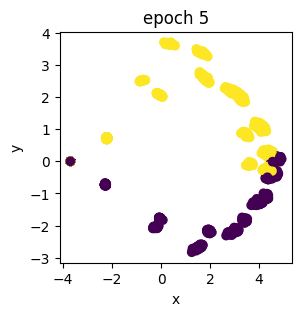

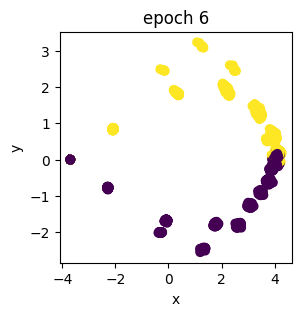

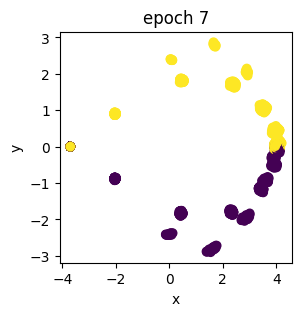

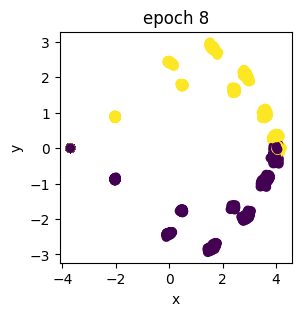

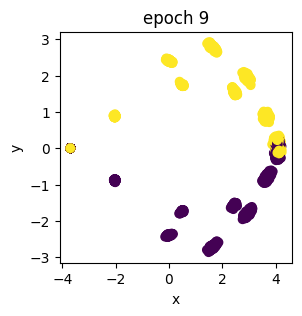

In [51]:
# plt.clf()
# plt.figure(figsize=(6,3))
for i in range(10):
    plt.figure(figsize=(3,3))
    plt.title(f"epoch {i}")
    plt.xlabel("x"); plt.ylabel("y")
    epoch_i_trajs = modality_metric(traj_dir1)['epoch_trajs'][i]
    epoch_i_classes = modality_metric(traj_dir1)['epoch_classes'][i]
    visualize_traj(epoch_i_trajs, epoch_i_classes)
    plt.show()

In [45]:
entropy([0, 0, 1, 1, 2, 2])

1.0986122886681096